# 회귀 (보스턴 집값)

# 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

# 데이터

In [2]:
from sklearn import datasets

In [3]:
housing = datasets.load_boston()

In [4]:
X_data = housing.data

In [5]:
y_data = housing.target

In [6]:
print(X_data.shape, y_data.shape)

(506, 13) (506,)


In [7]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)
X_data_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, 
                                                    y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


# 신경망 학습

In [11]:
# Layer를 순서대로 쌓아줄 객체 필요 => Sequantial
# 각 Layer는 Dense 객체
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [12]:
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=13)) # 13개의 컬럼이 들어간 1차원 배열
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='linear')) # 128개를 1개로 줄임

In [13]:
# # 모델 적용
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=13)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 563.5264 - mae: 21.8668 - 801ms/epoch - 62ms/step
Epoch 2/100
13/13 - 0s - loss: 492.8257 - mae: 20.1120 - 35ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 331.7798 - mae: 15.4559 - 38ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 143.8894 - mae: 9.2979 - 42ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 114.4403 - mae: 8.4035 - 32ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 88.1437 - mae: 7.0243 - 28ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 72.3803 - mae: 6.2754 - 54ms/epoch - 4ms/step
Epoch 8/100
13/13 - 0s - loss: 62.3897 - mae: 5.8645 - 36ms/epoch - 3ms/step
Epoch 9/100
13/13 - 0s - loss: 55.4437 - mae: 5.2760 - 28ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 50.7302 - mae: 5.0488 - 44ms/epoch - 3ms/step
Epoch 11/100
13/13 - 0s - loss: 47.5673 - mae: 4.8756 - 41ms/epoch - 3ms/step
Epoch 12/100
13/13 - 0s - loss: 44.1071 - mae: 4.6591 - 55ms/epoch - 4ms/step
Epoch 13/100
13/13 - 0s - loss: 41.2778 - mae: 4.5225 - 43ms/ep

In [17]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 10.7182 - mae: 2.3544


[10.718157768249512, 2.3543944358825684]

# 교차 검증

In [20]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200,
                    validation_split=0.25, verbose=2)

Epoch 1/200
10/10 - 1s - loss: 579.5583 - mae: 22.2181 - val_loss: 538.2965 - val_mae: 21.2292 - 782ms/epoch - 78ms/step
Epoch 2/200
10/10 - 0s - loss: 538.3090 - mae: 21.2012 - val_loss: 477.9527 - val_mae: 19.6529 - 76ms/epoch - 8ms/step
Epoch 3/200
10/10 - 0s - loss: 453.0484 - mae: 18.9506 - val_loss: 363.5590 - val_mae: 16.2268 - 454ms/epoch - 45ms/step
Epoch 4/200
10/10 - 0s - loss: 307.3990 - mae: 14.5229 - val_loss: 204.5027 - val_mae: 11.2729 - 131ms/epoch - 13ms/step
Epoch 5/200
10/10 - 0s - loss: 171.6213 - mae: 10.3500 - val_loss: 155.1827 - val_mae: 9.8630 - 123ms/epoch - 12ms/step
Epoch 6/200
10/10 - 0s - loss: 145.1836 - mae: 9.5233 - val_loss: 128.5484 - val_mae: 8.9453 - 121ms/epoch - 12ms/step
Epoch 7/200
10/10 - 0s - loss: 117.9981 - mae: 8.3705 - val_loss: 105.7654 - val_mae: 7.8372 - 107ms/epoch - 11ms/step
Epoch 8/200
10/10 - 0s - loss: 102.0115 - mae: 7.5279 - val_loss: 88.0233 - val_mae: 7.0926 - 87ms/epoch - 9ms/step
Epoch 9/200
10/10 - 0s - loss: 86.7794 - mae

Epoch 72/200
10/10 - 0s - loss: 11.0286 - mae: 2.2894 - val_loss: 13.5140 - val_mae: 2.4697 - 72ms/epoch - 7ms/step
Epoch 73/200
10/10 - 0s - loss: 10.9595 - mae: 2.2793 - val_loss: 13.5881 - val_mae: 2.5431 - 66ms/epoch - 7ms/step
Epoch 74/200
10/10 - 0s - loss: 10.9108 - mae: 2.2746 - val_loss: 13.3971 - val_mae: 2.4503 - 59ms/epoch - 6ms/step
Epoch 75/200
10/10 - 0s - loss: 10.8321 - mae: 2.2687 - val_loss: 13.3724 - val_mae: 2.4348 - 61ms/epoch - 6ms/step
Epoch 76/200
10/10 - 0s - loss: 10.6675 - mae: 2.2872 - val_loss: 13.4496 - val_mae: 2.4295 - 69ms/epoch - 7ms/step
Epoch 77/200
10/10 - 0s - loss: 10.5060 - mae: 2.2293 - val_loss: 13.0203 - val_mae: 2.4412 - 57ms/epoch - 6ms/step
Epoch 78/200
10/10 - 0s - loss: 10.3725 - mae: 2.2250 - val_loss: 13.1392 - val_mae: 2.5384 - 70ms/epoch - 7ms/step
Epoch 79/200
10/10 - 0s - loss: 11.2125 - mae: 2.3551 - val_loss: 13.8993 - val_mae: 2.4464 - 54ms/epoch - 5ms/step
Epoch 80/200
10/10 - 0s - loss: 10.3556 - mae: 2.2547 - val_loss: 12.982

Epoch 143/200
10/10 - 0s - loss: 5.5730 - mae: 1.7434 - val_loss: 11.8787 - val_mae: 2.4547 - 61ms/epoch - 6ms/step
Epoch 144/200
10/10 - 0s - loss: 5.6719 - mae: 1.7815 - val_loss: 11.6395 - val_mae: 2.4032 - 57ms/epoch - 6ms/step
Epoch 145/200
10/10 - 0s - loss: 5.7721 - mae: 1.7718 - val_loss: 11.9415 - val_mae: 2.4071 - 65ms/epoch - 7ms/step
Epoch 146/200
10/10 - 0s - loss: 5.6765 - mae: 1.7446 - val_loss: 11.7700 - val_mae: 2.4261 - 65ms/epoch - 7ms/step
Epoch 147/200
10/10 - 0s - loss: 5.4516 - mae: 1.7102 - val_loss: 11.8822 - val_mae: 2.4193 - 62ms/epoch - 6ms/step
Epoch 148/200
10/10 - 0s - loss: 5.6197 - mae: 1.7496 - val_loss: 11.6074 - val_mae: 2.4186 - 56ms/epoch - 6ms/step
Epoch 149/200
10/10 - 0s - loss: 5.4824 - mae: 1.6934 - val_loss: 11.7118 - val_mae: 2.4636 - 66ms/epoch - 7ms/step
Epoch 150/200
10/10 - 0s - loss: 5.2933 - mae: 1.6887 - val_loss: 11.5872 - val_mae: 2.3949 - 67ms/epoch - 7ms/step
Epoch 151/200
10/10 - 0s - loss: 5.5818 - mae: 1.7335 - val_loss: 12.250

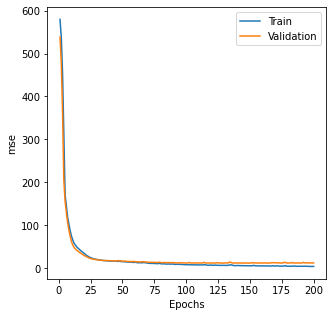

In [21]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['loss'][start-1:total_epoch], 
             label='Train')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_loss'][start-1:total_epoch], 
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(total_epoch=200, start=1)

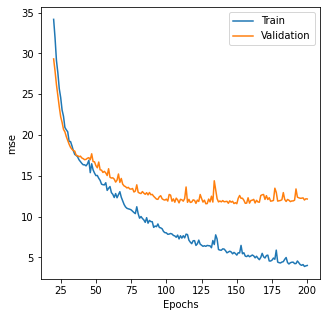

In [22]:
plot_loss_curve(total_epoch=200, start=20)